In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
import json

import tensorflow as tf

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'stepnet'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model, get_perf, FixedPoint_Model
import tools
from analysis import clustering, standard_analysis, variance

In [2]:
model_n = 0
task_list = ['delaydm1',]
rule = task_list[0]
which_net = 'l2w0001'
fldr = 'single_tasks'
supp = []#'long_train'

if fldr == '4_tasks':
    s = '_'
    rule_trains_str = s.join(task_list)
    file_spec = os.path.join(fldr,which_net+'_'+rule_trains_str)
elif fldr == 'single_tasks':
    rule = task_list[0]
    file_spec = os.path.join('single_tasks','l2w0001',rule)
else:
    file_spec = which_net
    
dir_specific_all = os.path.join('crystals','softplus',file_spec)#,supp)
    
m = os.path.join(p,'data/rnn/multitask/',net,dir_specific_all,str(model_n))

# m = os.path.join(p,'data/rnn/multitask/','robert',str(model_n))

figpath = os.path.join(p,'code','overleaf','multitask-nets','v1_figs','clusters')
if not os.path.exists(figpath):
    os.makedirs(figpath)

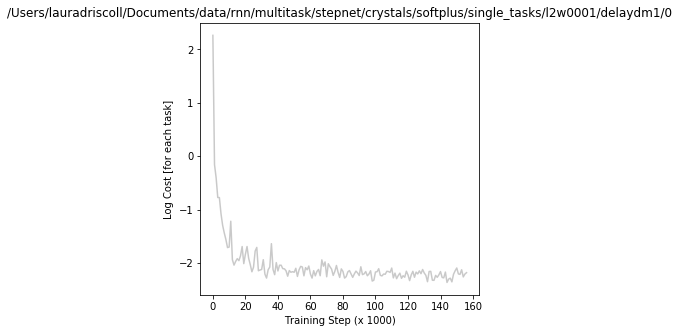

In [3]:
fig = plt.figure(figsize=(5, 5))
cmap=plt.get_cmap('Greys')
fname = os.path.join(m, 'log.json')

with open(fname, 'r') as f:
    log_all = json.load(f)
for r in range(len(task_list)):
    c = cmap((r+1)/(len(task_list)+1))
    ax = fig.add_subplot(1,1,1)
    x = np.log(log_all['cost_'+task_list[r]])
    plt.plot(x,'-',c = c,alpha = .5)
    ax.set_xlabel('Training Step (x 1000)')
    ax.set_ylabel('Log Cost [for each task]')
#     plt.ylim([-6,2])
    
plt.title(m)
plt.show()    

In [4]:
model = Model(m, sigma_rec=0)
with tf.Session() as sess:
    model.restore()
    hp = model.hp

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/model.ckpt


In [10]:
variance.compute_variance(m)

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/model.ckpt
[u'delaydm1']
Variance saved at /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/variance_rule.pkl
Variance saved at /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/variance_epoch.pkl


ValueError: No hp found for model_dir /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/ckpts

In [11]:
save_name = '_'+file_spec+'_'+str(model_n)

# # Clustering Analysis------------------------------------------------------
CA = clustering.Analysis(m, data_type='rule')
CA.plot_example_unit()
CA.plot_cluster_score(save_name = save_name)
CA.plot_variance(save_name = save_name)
CA.plot_2Dvisualization('PCA')
CA.plot_2Dvisualization('MDS')
CA.plot_2Dvisualization('tSNE')
CA.plot_lesions(save_name = save_name)
CA.plot_connectivity_byclusters()

/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:968: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Choosing 8 clusters


IOError: [Errno 2] No such file or directory: 'figure/feature_map_byepoch_normmax_single_tasks/l2w0001/delaydm1_0.pdf'

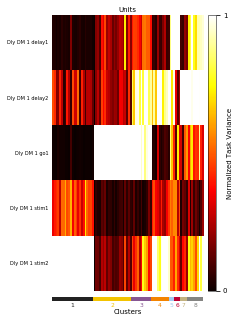

In [12]:
save_name = '_'+file_spec+'_'+str(model_n)

# os.mkdir('figure/')

CA = clustering.Analysis(m, data_type='epoch')
CA.plot_variance(save_name = save_name)
CA.plot_2Dvisualization('tSNE')

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

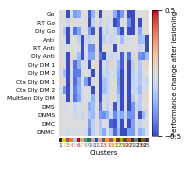

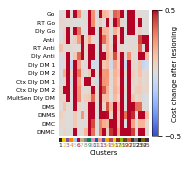

In [6]:
CA.plot_lesions(save_name = save_name)

In [6]:
perfs_changes, cost_changes = CA.lesions()

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

In [7]:
lesion_units_list = [None]
for il, l in enumerate(CA.unique_labels):
    ind_l = np.where(CA.labels == l)[0]
    # In original indices
    lesion_units_list += [CA.ind_active[ind_l]]

for i, lesion_units in enumerate(lesion_units_list):
    print(i)
    print(lesion_units)
    

0
None
1
[118 113  88]
2
[109 141  90  75  69 168 124 217]
3
[ 60 132  33  52  48]
4
[79]
5
[123 102 224 172]
6
[153  73 164 183]
7
[237  23  63 160]
8
[230  97]
9
[216 148  71  15 218]
10
[145  59 155]
11
[ 76 161]
12
[  7  89 223  68  41 181  30 187 202 162]
13
[144 207]
14
[147 116  37  24  85]
15
[219   1  55   4   6]
16
[ 20 117 166  62  38 215   9   8 186 214]
17
[131 200 128  50]
18
[140 100 238  74  64 126]
19
[  2 226]
20
[198 171  17 222 243 180 204 167  14]
21
[35 67 77 78]
22
[150  99 193 115 255]
23
[210  12  49 138 173 170  66 130 139  28 136 105 134 133]
24
[179  98]
25
[246  19 154 185 225 121]


In [ ]:
# epoch = 'stim1'
# f = os.path.join(m,'tf_fixed_pts_all_init','fdanti',epoch+'_'+str(324)+'.0.npz')
# D_use,_,_ = make_FP_axs(f,m,'fdanti',epoch,axs ='pca', clust = 'False')
# axes_label1 = 'fp pca_1'
# axes_label2 = 'fp pca_2'
# axes_label3 = 'fp pca_3'

In [6]:
cluster=8

In [7]:
tasks_affected = np.where(perfs_changes[cluster,:]<-.6)[0]
task_list = [hp['rule_trains'][x] for x in tasks_affected]

NameError: name 'perfs_changes' is not defined

In [6]:
task_list = ['delaydm1', 'contextdelaydm1']

In [13]:
from tools_lnd import make_h_all

# rule = 'delaygo'
# epoch = 'delay1'
hparams = model.hp
# trial = generate_trials(rule, hparams, 'test', noise_on=False)
h_all_byepoch, h_all_byrule = make_h_all(m)

X_rule = h_all_byrule[task_list[0]]
X_use = np.reshape(X_rule[:],(-1,hparams['n_rnn']))
for rule in task_list:
    X_rule = h_all_byrule[rule]
    X_use = np.concatenate((X_use,np.reshape(X_rule[:],(-1,hparams['n_rnn']))),axis = 0)

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
fp_pca = pca.fit_transform(X_use)
D_use = pca.components_.T
# D_use = D_use[:,[0,2,1]]
axes_label1 = 'pca_1'
axes_label2 = 'pca_2'
axes_label3 = 'pca_3'

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/model.ckpt


In [123]:
# react_tasks = [1,4]
# delay_tasks = [0,2,3,5,6,7,8,9,10]

# task_list = [hp['rule_trains'][x] for x in delay_tasks[:5]]

In [8]:
np.shape(h_all_byrule[rule])[1]

3200

/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


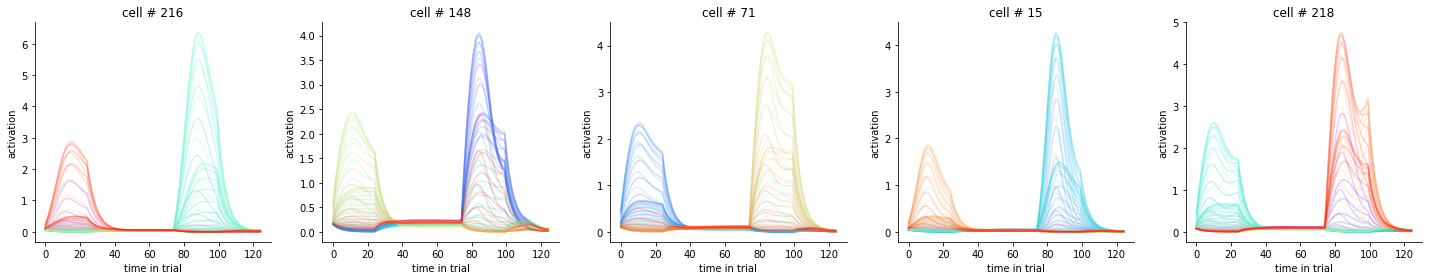

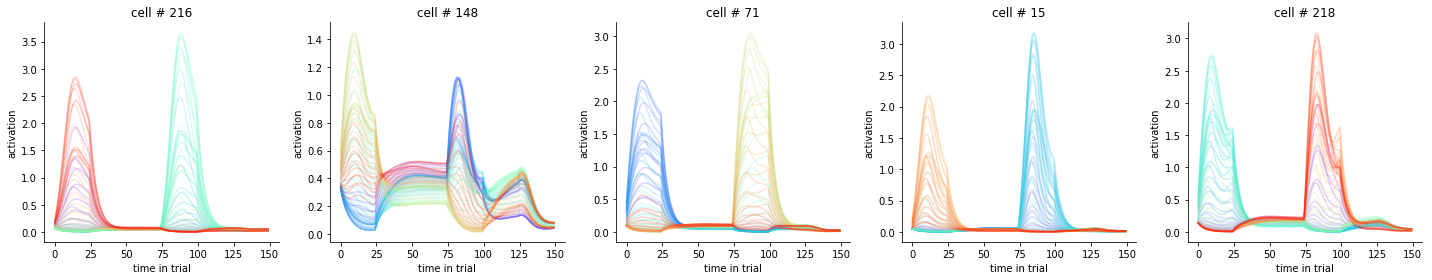

In [10]:
cmap = plt.get_cmap('rainbow')
cluster = 8
cel_use = CA.ind_active[CA.labels==cluster]

for rule in task_list:
    fig = plt.figure(figsize=(4*len(cel_use),4),tight_layout=True,facecolor='white')
    X_use = h_all_byrule[rule]
    cel_i = 0
    for unit_i in cel_use:
        cel_i+=1
        ax = plt.subplot(1,len(cel_use),cel_i)
        trials_use = range(0,np.shape(h_all_byrule[rule])[1],int(np.shape(h_all_byrule[rule])[1]/80))
        X_flat = np.reshape(X_use[:,trials_use,:],(-1,hp['n_rnn']))
        for n in range(80):
            plt.plot(X_flat[range(n,len(X_flat),80),unit_i],'-',c = cmap(n/80),alpha = .2)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.title('cell # '+(str(unit_i)))
        plt.xlabel('time in trial')
        plt.ylabel('activation')

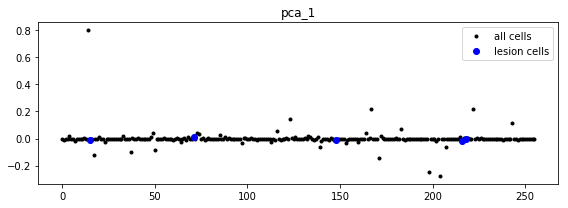

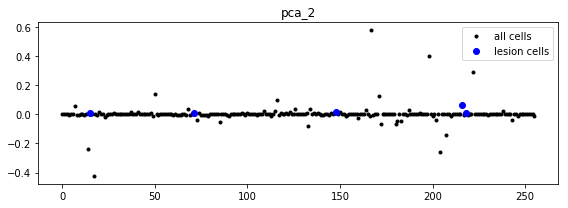

In [13]:
cels = CA.ind_active[CA.labels==cluster]
labels = [axes_label1,axes_label2]
for x in range(len(labels)):

    fig = plt.figure(figsize=(8,3),tight_layout=True,facecolor='white')
    plt.plot(D_use[:,x],'.k',label = 'all cells')
    plt.plot(cels,D_use[cels,x],'ob',label = 'lesion cells')
    plt.title(labels[x])
    plt.legend()
    plt.show()

In [20]:
from tools_lnd import get_model_params
w_in, b_in, w_out, b_out = get_model_params(m)
D_use = w_out[:,1:]

axes_label1 = 'W_{out} cos(theta)'
axes_label2 = 'W_{out} sin(theta)'

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [14]:
fp_epoch = 'go1'
ind = -1

In [128]:
def make_Beta(m,task_list,fp_epoch,ind=-1):
    h_all,trial_all,_ = make_h_trial_rule(m,mode = 'test',noise_on = False)
    T_inds = get_T_inds(trial_all[task_list[0]],fp_epoch)[-2:-1]
    B,N = np.shape(h_all[task_list[0]][T_inds[ind],:,:])
    R = np.zeros((len(task_list)*B*len(T_inds),N))
    Y = np.zeros((13,len(task_list)*B*len(T_inds)))

    for rule_i in range(len(task_list)):
        rule = task_list[rule_i]
        T_inds = get_T_inds(trial_all[rule],fp_epoch)[-2:-1]

        trial_use = range(0,np.shape(h_all[rule])[1],int(np.shape(h_all[rule])[1]/B))
        r = np.reshape(h_all[rule][T_inds,trial_use,:],(len(T_inds)*B,N))

        isanti = 'anti' in task_list[rule_i]
        ismemory = 'delay' in task_list[rule_i]
        y_anti = isanti*np.ones((np.shape(r)[0],1))
        y_memory = ismemory*np.ones((np.shape(r)[0],1))

        stim_locs = trial_all[rule].stim_locs[trial_use,:]
        y_stim1 = np.repeat(np.min(stim_locs[:,[0,2]],axis=1),len(T_inds))
        y_stim2 = np.repeat(np.min(stim_locs[:,[1,3]],axis=1),len(T_inds))
        
        y_mod1stim1 = np.repeat(stim_locs[:,0],len(T_inds))
        y_mod2stim1 = np.repeat(stim_locs[:,2],len(T_inds))
        y_mod1stim2 = np.repeat(stim_locs[:,1],len(T_inds))
        y_mod2stim2 = np.repeat(stim_locs[:,3],len(T_inds))

        y_out = np.repeat(trial_all[rule].y_loc[-1,trial_use],len(T_inds))

        inds = range((B*len(T_inds))*rule_i,(B*len(T_inds))*(rule_i+1))

        R[inds,:] = r
        Y[0,inds] = np.expand_dims(isanti,axis = 0)
        Y[1,inds] = np.expand_dims(ismemory,axis = 0)
        Y[2,inds] = np.expand_dims(np.sin(y_mod1stim1),axis = 0)
        Y[3,inds] = np.expand_dims(np.cos(y_mod1stim1),axis = 0)
        Y[4,inds] = np.expand_dims(np.sin(y_mod2stim1),axis = 0)
        Y[5,inds] = np.expand_dims(np.cos(y_mod2stim1),axis = 0)
        Y[6,inds] = np.expand_dims(np.sin(y_mod1stim2),axis = 0)
        Y[7,inds] = np.expand_dims(np.cos(y_mod1stim2),axis = 0)
        Y[8,inds] = np.expand_dims(np.sin(y_mod2stim2),axis = 0)
        Y[9,inds] = np.expand_dims(np.cos(y_mod2stim2),axis = 0)
        Y[10,inds] = np.expand_dims(np.sin(y_out),axis = 0)
        Y[11,inds] = np.expand_dims(np.cos(y_out),axis = 0)
        Y[12,inds] = np.repeat(T_inds,B)

        Y_labels = ['ANTI v. Pro','MEMORY v. DELAY','MOD1STIM1 '+ r' $\cos{\theta}$','MOD1STIM1 '+ r' $\sin{\theta}$',
                    'MOD2STIM1 '+ r' $\cos{\theta}$','MOD2STIM1 '+ r' $\sin{\theta}$','MOD1STIM2 '+ r' $\cos{\theta}$',
                    'MOD1STIM2 '+ r' $\sin{\theta}$','MOD2STIM2 '+ r' $\cos{\theta}$','MOD2STIM2 '+ r' $\sin{\theta}$',
                    'OUT '+ r' $\cos{\theta}$','OUT '+ r' $\sin{\theta}$','TIME']

    lm = linear_model.LinearRegression()
    model = lm.fit(Y.T,R)
    Beta = model.coef_
    Beta_qr,_ = LA.qr(Beta)
    return Beta_qr,Y_labels

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from numpy import linalg as LA
from tools_lnd import make_h_trial_rule, get_T_inds#, make_Beta
Beta_qr,Y_labels = make_Beta(m,task_list,'go1',ind=-1)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [130]:
use_yinds = [2,4,6]
axes_label1 = Y_labels[use_yinds[0]]
axes_label2 = Y_labels[use_yinds[1]]
axes_label3 = Y_labels[use_yinds[2]]
D_use = Beta_qr[:,use_yinds]

In [ ]:
D_use[:,1] = w_out[:,1]
axes_label2 = 'W_{out} cos(theta)'

In [17]:
react_tasks = [1,4]
delay_tasks = [0,2,3,5,6,7,8,9,10]
dm1_tasks = [6,8,]
dm2_tasks = [7,9,]

task_list = [hp['rule_trains'][x] for x in dm1_tasks]

In [15]:
task_list

[u'delaydm1', u'contextdelaydm1']

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


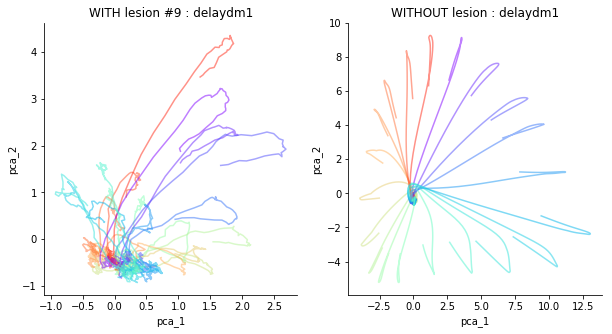

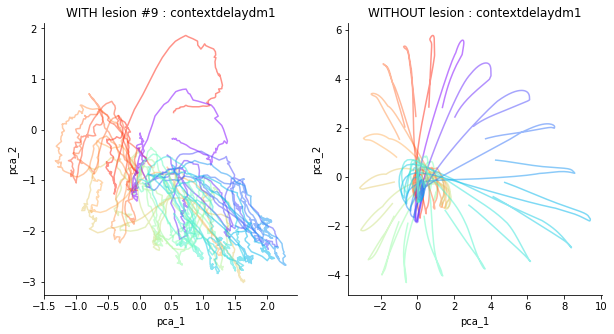

In [17]:
labels = CA.labels

from network import get_perf
from task import generate_trials

# lesion cluster
cluster = 8
ind_l = np.where(CA.labels == cluster)[0]
lesion_units_list = [CA.ind_active[ind_l]][0]

#no lesion
# lesion_units_list = []


cmap = plt.get_cmap('rainbow')

model = FixedPoint_Model(CA.model_dir)
hp = model.hp
with tf.Session() as sess:
    model.restore()
    model._sigma=0
    if len(lesion_units_list)>0:
        model.lesion_units(sess, lesion_units_list)

    for rule in task_list:
        trial = generate_trials(rule, hp, 'test', noise_on = 'False')
        feed_dict = tools.gen_feed_dict(model, trial, hp)
        h_tf = sess.run([model.h], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)

        fig = plt.figure(figsize=(10, 5))
        for trial_i in range(0,np.shape(trial.x)[1],int(np.shape(trial.x)[1]/20)):
            c = cmap(trial.y_loc[-1,trial_i]/(2*np.pi))
            
            ax = plt.subplot(1,2,1)
            X_dot = np.dot(h_tf[0][trial.epochs['fix1'][1]:,trial_i,:],D_use)
            plt.plot(X_dot[:,0],X_dot[:,1],c = c,alpha = .5)
#             plt.ylim([-1.2,1.2])
#             plt.xlim([-5,5])
#             plt.ylim([-5,5])
            plt.xlabel(axes_label1)
            plt.ylabel(axes_label2)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False) 
            plt.title('WITH lesion #'+str(cluster+1)+' : '+rule)
            

            ax = plt.subplot(1,2,2)
            X_rule = np.dot(h_all_byrule[rule][:,trial_i,:],D_use)
            plt.plot(X_rule[:,0],X_rule[:,1],c = c,alpha = .5)
#             plt.ylim([-1.2,1.2])
#             plt.xlim([-5,5])
#             plt.ylim([-5,5])
            plt.xlabel(axes_label1)
            plt.ylabel(axes_label2)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False) 
            plt.title('WITHOUT lesion : '+rule)
            
        plt.show()

In [18]:
n_bins = 16
n_rep = 16
batch_size_test = 256*16
batch_size_test_rep = int(batch_size_test / n_rep)
clsq_tmp = list()
perf_tmp = np.empty((len(task_list),n_rep,n_bins-1))
        
model = Model(CA.model_dir)
hp = model.hp
with tf.Session() as sess:
    model.restore()
    model.lesion_units(sess, lesion_units_list)

    perfs_store = list()
    cost_store = list()
    for rule_i in range(len(task_list)):
        rule = task_list[rule_i]
        for i_rep in range(n_rep):
            trial = generate_trials(rule, hp, 'random',batch_size=batch_size_test_rep)
            feed_dict = tools.gen_feed_dict(model, trial, hp)
            y_hat_test, c_lsq = sess.run([model.y_hat, model.cost_lsq], feed_dict=feed_dict)

            # Cost is first summed over time, and averaged across batch and units
            # We did the averaging over time through c_mask

            # IMPORTANT CHANGES: take overall mean
            bins = np.linspace(0,2*np.pi,n_bins)
            perf_test = np.ones((n_bins-1))
            for theta_i in range(len(bins)-1):
                inds = [all([x>bins[theta_i],x<bins[theta_i+1]]) for x in trial.y_loc[-1,:]]
                perf_test[theta_i] = np.mean(get_perf(y_hat_test[:,inds,:], trial.y_loc[:,inds]))
                
            perf_tmp[rule_i,i_rep,:] = perf_test
#                 clsq_tmp.append(c_lsq)
                

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt


In [19]:
task_list

[u'delaydm1', u'contextdelaydm1']

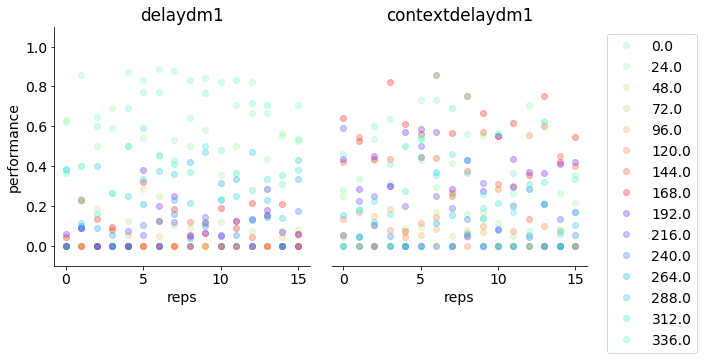

In [95]:
fig = plt.figure(figsize=(5*len(task_list),5),tight_layout=True,facecolor='white')
for rule_i in range(len(task_list)):
    ax = plt.subplot(1,len(task_list),rule_i+1)
    for theta_i in range(len(bins)-1):
        c = (180*(np.pi + bins[theta_i])/np.pi)%360
        plt.plot(perf_tmp[rule_i,:,theta_i],'o',c = cmap(c/360),alpha = .3,label = str(round(180*bins[theta_i]/np.pi,0)))
    plt.ylim([-.1,1.1])
    plt.title(task_list[rule_i])
    plt.xlabel('reps')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if rule_i==0:
        plt.ylabel('performance')
    else:
        ax.spines['left'].set_visible(False)
        plt.yticks([])
            
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [170]:
vmins = [-0.5, -0.5]
vmaxs = [+0.5, +0.5]
ticks = [[-0.5,0.5], [-0.5, 0.5]]

In [ ]:
plt.imshow(perfs_changes.T, cmap='coolwarm', aspect='auto',
                           interpolation='nearest', vmin=vmins[i], vmax=vmaxs[i])

In [9]:
def plot_FP_jitter_3D_lesion(lesion_units_list,ax,m,D_use,rule,t_num,fp_epoch,sorted_fps,fp_inds,eig_decomps,
                   xlabel = 'FP set PC1',ylabel = 'FP set PC2',rand_step_coef = 0.1,n_steps = 100,
                   lw = 3,al = .6,linestyle = '-',n_jit = 0,c = 'k'):

    cmap=plt.get_cmap('rainbow')
        
    model = Model(m)
    with tf.Session() as sess:
        model.restore()
        model._sigma=0
        if len(lesion_units_list)>0:
            model.lesion_units(sess, lesion_units_list)
        hparams = model.hp
        alpha = hparams['dt']/hparams['tau']
        var_list = model.var_list
        params = [sess.run(var) for var in var_list]

        trial = generate_trials(rule, hparams, mode='test',noise_on=False)
        feed_dict = tools.gen_feed_dict(model, trial, hparams)
        h_tf, _ = sess.run([model.h, model.y_hat], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)
        T,S,N = np.shape(h_tf)
        T_inds = get_T_inds(trial,fp_epoch) # grab epoch time indexing
        x_t = np.matlib.repmat(trial.x[T_inds[1],t_num,:],n_steps,1)
        
        fp_project = np.dot(sorted_fps,D_use)

        # runs jitters around fps
        stable = np.empty(len(fp_inds))
        for fp_ind in fp_inds:

            for jit in range(n_jit):
                h0 = sorted_fps[fp_ind,:] + rand_step_coef*npr.randn(N)
                h_t = vanilla_run_with_h0(params, x_t, h0, hparams)
                jitter = np.dot(h_t,D_use)
                ax.plot3D(jitter[:,0],jitter[:,1],jitter[:,2],'-',c = 'k',linewidth = .1)
                
            stable[fp_ind] = np.max(eig_decomps[fp_ind]['evals'].real**2+eig_decomps[fp_ind]['evals'].imag**2)

        stable_inds = np.where(stable<1)[0]
        ax.plot3D(fp_project[stable_inds,0],fp_project[stable_inds,1],fp_project[stable_inds,2],'o',
        c = c,markersize = 10, markerfacecolor = c,alpha = 1,linewidth = 5)

        unstable_inds = np.where(stable>1)[0]
        ax.plot3D(fp_project[unstable_inds,0],fp_project[unstable_inds,1],fp_project[unstable_inds,2],'o',
        c = c,markersize = 10, markerfacecolor = 'None',alpha = 1,linewidth = 5)
                
        #runs one state for n_steps starting from initial conditions
        for jit in range(1):
            h0 = h_tf[T_inds[0],t_num,:]
            h_t = vanilla_run_with_h0(params, x_t, h0, hparams)
            jitter = np.dot(h_t,D_use)
            ax.plot3D(jitter[:,0],jitter[:,1],jitter[:,2],'-',c = c,linewidth = 3)

In [10]:
def plot_N3D(X, D, clist, linewidth = 1, alpha = .5, linestyle = '-'):
    """Plot activity is some 2D space.

        Args:
            X: neural activity in Trials x Time x Neurons
            D: Neurons x 2 plotting dims
        """

    cmap=plt.get_cmap('rainbow')
    S = np.shape(X)[0]
    
    for s in range(S):

        if isinstance(c_list, str) :
            c = clist
        else:
            c = cmap(clist[s]/max(clist))

        X_trial = np.dot(X[s,:,:],D.T)
#         ax.scatter3D(X_trial[-1,0],X_trial[-1,1],X_trial[-1,2],'^',c = c, linewidth = linewidth, alpha = alpha)
        ax.plot3D(X_trial[:,0],X_trial[:,1],X_trial[:,2],linestyle,c = c, linewidth = linewidth, alpha = alpha)
#         ax.scatter3D(X_trial[0,0],X_trial[0,1],X_trial[0,2],'.',c = c, linewidth = linewidth, alpha = alpha)

In [12]:
from tools_lnd import make_FP_axs, take_names
axs = 'pca_h'
epoch = 'stim1'
stim_axs = 0
f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(0)+'.0.npz')
D_use,_,_ = make_FP_axs(f,m,rule,epoch,axs =axs, clust = 'False')
epoch_name, rule_name, _, _ = take_names(epoch,rule)
axes_label1 =  epoch_name +' '+ axs + ' 1'
axes_label2 = epoch_name +' '+ axs + ' 2'
axes_label3 = epoch_name +' '+ axs + ' 3'

IOError: [Errno 2] No such file or directory: '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/tf_fixed_pts_all_init/delaydm1/stim1_0.0.npz'

In [14]:
lesion_cluster = 8
ind_l = np.where(CA.labels == lesion_cluster)[0]
lesion_units_list = [CA.ind_active[ind_l]][0]

NameError: name 'CA' is not defined

In [15]:
lesion_units_list = []

In [25]:
%matplotlib

Using matplotlib backend: MacOSX


In [118]:
y1 = trial.x[trial.epochs['stim1'][1]-1,:,1:3]
y2 = trial.x[trial.epochs['stim1'][1]-1,:,3:5]

y1 = trial.x[trial.epochs['stim2'][1]-1,:,1:3]
y2 = trial.x[trial.epochs['stim2'][1]-1,:,3:5]

from network import popvec
ang1 = popvec(y1)
ang2 = popvec(y2)

In [7]:
def get_filename(trial,epoch,t):
    ind_stim_loc  = str(int(180*trial.y_loc[-1,t]/np.pi))
    nonzero_stim = trial.stim_locs[0,:]<100
    stim_names = '_'.join(str(int(180*x/np.pi)) for x in trial.stim_locs[t,nonzero_stim])
    filename = epoch+'_trial'+str(t)+'_x'+stim_names+'_y'+ind_stim_loc

    return filename, ind_stim_loc

In [119]:
fig = plt.figure(figsize=(5,5),tight_layout=True,facecolor='white')
plt.plot(trial.stim_locs[trial_set,0],'.')
plt.plot(trial.stim_locs[trial_set,1],'.')
plt.show()

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Use

NameError: name 'D_use' is not defined

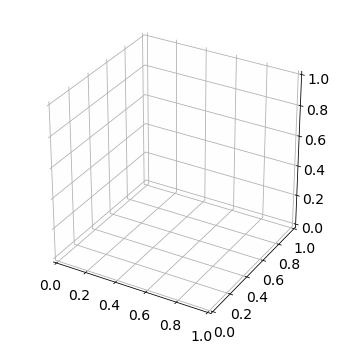

In [11]:
epoch = 'delay1'

fig = plt.figure(figsize=(5,5),tight_layout=True,facecolor='white')
ax = fig.add_subplot(111, projection='3d')
w_color = .005
ax.w_xaxis.set_pane_color((w_color, w_color, w_color, w_color))
ax.w_yaxis.set_pane_color((w_color, w_color, w_color, w_color))
ax.w_zaxis.set_pane_color((w_color, w_color, w_color, w_color))

rule = 'delaydm1'
trial = gen_trials_from_model_dir(m,rule,mode = 'random',noise_on = False)

if epoch=='stim2' or epoch=='delay2':
    c_list = trial.stim_locs[:,1]
elif epoch=='stim1' or epoch=='delay1':
    c_list = trial.stim_locs[:,0]
    
# c_list = trial.y_loc[-1,:]
_,x = gen_X_from_model_dir(m,trial)
T_inds = get_T_inds(trial,epoch)
x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))
trial_set = range(0,400,4)
plot_N3D(x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = '-',alpha = .3)
plt.title(epoch)

# rule = 'delaydm2'
# trial = gen_trials_from_model_dir(m,rule,noise_on = False)

# if epoch=='stim2':
#     c_list = trial.stim_locs[:,3]
# elif epoch=='stim1':
#     c_list = trial.stim_locs[:,2]
    
# _,x = gen_X_from_model_dir(m,trial)
# T_inds = get_T_inds(trial,epoch)
# x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))
# plot_N3D(x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = ':',alpha = .3)

In [135]:
print(os.path.join('single_tasks','l2w0001',rule))

single_tasks/l2w0001/delaydm1


In [132]:
use_yinds = [2,3,6]
axes_label1 = Y_labels[use_yinds[0]]
axes_label2 = Y_labels[use_yinds[1]]
axes_label3 = Y_labels[use_yinds[2]]
D_use = Beta_qr[:,use_yinds]

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/delaydm1/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Use

NameError: name 'D_use' is not defined

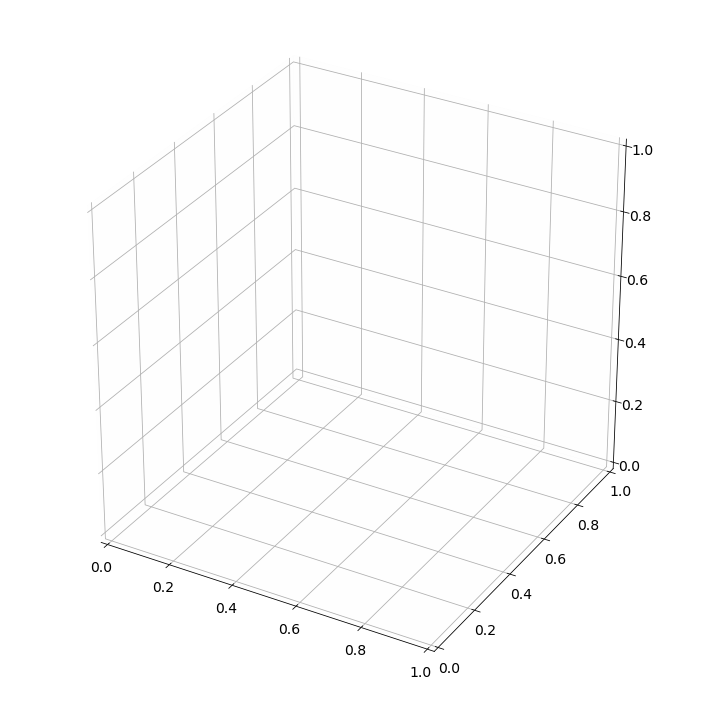

In [16]:
########## TASK DYNAMICS ###########
# from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 14})
from mpl_toolkits import mplot3d
from itertools import compress 
from tools_lnd import gen_X_from_model_dir, gen_trials_from_model_dir, get_T_inds, vanilla_run_with_h0,comp_eig_decomp
import numpy.random as npr

cmap_grad = plt.get_cmap('plasma')
cmap_rainbow = plt.get_cmap('rainbow')
cmap_discrete = ['darkorchid','orange']

rule = 'delaydm1'
epoch = 'stim2'
step_file = 'task_dynamics'

for t in [2,]:#range(216,324,36):# 144
    
    fig = plt.figure(figsize=(10,10),tight_layout=True,facecolor='white')
    ax = fig.add_subplot(111, projection='3d')
    w_color = .005
    ax.w_xaxis.set_pane_color((w_color, w_color, w_color, w_color))
    ax.w_yaxis.set_pane_color((w_color, w_color, w_color, w_color))
    ax.w_zaxis.set_pane_color((w_color, w_color, w_color, w_color))

    trial = gen_trials_from_model_dir(m,rule, noise_on = False)
    filename, _ = get_filename(trial,epoch,t)

    B = np.shape(trial.x)[1]
    trial_set = range(2,B,int(B/80))

    if len(lesion_units_list)>0:
        f = os.path.join(m,'lesion_fps','tf_fixed_pts_lesion'+str(lesion_cluster+1),rule,filename+'.npz')
    else:
        f = os.path.join(m,'tf_fixed_pts_all_init',rule,filename+'.npz')
        
    fp_struct = np.load(f)
    sorted_fps = fp_struct['xstar']
    fp_inds = range(len(sorted_fps))
    eig_decomps = comp_eig_decomp(fp_struct['J_xstar'])

    _,x = gen_X_from_model_dir(m,trial)
    T_inds = get_T_inds(trial,epoch)
    x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))

    ##color by stim
#         c_list = np.min(trial.stim_locs,axis=1)

    ##color by target
    c_list = trial.y_loc[-1,:]

    plot_FP_jitter_3D_lesion(lesion_units_list,ax,m,D_use,rule,t,epoch,sorted_fps,fp_inds,eig_decomps,
           rand_step_coef = 0.1, al = 1, linestyle = '-', n_steps = 10, 
               n_jit = 1,c = cmap_rainbow(c_list[t]/(2*np.pi)))

    plot_N3D(x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = '-',alpha = .3)
    
    if len(lesion_units_list)>0:
        save_dir = os.path.join(figpath,step_file,'lesion_fps'+str(lesion_cluster),axes_label1)
        tit = 'lesion_fps'+str(lesion_cluster)+rule+'_'+filename
    else:
        save_dir = os.path.join(figpath,step_file,axes_label1)
        tit = 'no lesion '+rule+'_'+filename
        
    ax.text2D(0.05, 0.95, tit, transform=ax.transAxes)
    ax.set_xlabel(axes_label1,fontsize = 18)
    ax.set_ylabel(axes_label2,fontsize = 18)
    ax.set_zlabel(axes_label3,fontsize = 18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
 
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir,filename+'.pdf'))
    plt.savefig(os.path.join(save_dir,filename+'.png'))
    plt.show()
#     pdb.set_trace()

In [29]:
########## X TASK ###########
# from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 14})
from mpl_toolkits import mplot3d
from itertools import compress 
from tools_lnd import gen_X_from_model_dir, gen_trials_from_model_dir, get_T_inds, vanilla_run_with_h0,comp_eig_decomp
import numpy.random as npr


for offset in [0,]:#range(0,360,72):# 144
    fig = plt.figure(figsize=(10,10),tight_layout=True,facecolor='white')
    t_set = [(180+offset)%360, (180+offset)%360]
    trial_num = [int(offset/4.5),int(offset/4.5)]
    trial_set = range(0,80,8)

    rule_set = ['fdanti','delayanti']
    epoch_set = ['stim1','stim1']
    step_file = 'interp_tasks'
    linestyle = ['-','--']
    n_interp = 20

    trial_str = '_'.join(str(round(t,2)) for t in t_set[:len(rule_set)])
    rule_str = '_'.join(str(r) for r in rule_set)
    epoch_str = '_'.join(str(r) for r in epoch_set[:len(rule_set)])

    cmap_grad = plt.get_cmap('plasma')
    cmap_rainbow = plt.get_cmap('rainbow')
    cmap_discrete = ['darkorchid','orange']
    ax = fig.add_subplot(111, projection='3d')
    w_color = .005
    ax.w_xaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_yaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_zaxis.set_pane_color ((w_color, w_color, w_color, w_color))

    for ri in range(len(rule_set)):
        rule = rule_set[ri]
        trial = gen_trials_from_model_dir(m,rule,noise_on = False)
        epoch = epoch_set[ri]

#         f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        
        if len(lesion_units_list)>0:
            f = os.path.join(m,'lesion_fps','tf_fixed_pts_lesion'+str(lesion_cluster+1),rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        else:
            f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        
        
        fp_struct = np.load(f)
        sorted_fps = fp_struct['xstar']
        fp_inds = range(len(sorted_fps))
        eig_decomps = comp_eig_decomp(fp_struct['J_xstar'])
        
        
        _,x = gen_X_from_model_dir(m,trial)
        T_inds = get_T_inds(trial,epoch)
        x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))

        #color by stim
        c_list = np.min(trial.stim_locs,axis=1)

        #color by target
    #     c_list = trial.y_loc[-1,:]

    
        plot_FP_jitter_3D_lesion(lesion_units_list,ax,m,D_use,rule,trial_num[ri],epoch,sorted_fps,fp_inds,eig_decomps,
               rand_step_coef = 0.1, al = 1, linestyle = linestyle, n_steps = 300, 
                   n_jit = 5,c = cmap_discrete[ri])


        plot_N3D(x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = linestyle[ri],alpha = .3)
    #     c_list = cmap_discrete[ri]
    #     highlight_trial = [trial_num[0],]
    #     plot_N3D(x_epoch[highlight_trial,:,:],D_use.T,c_list,linewidth = 3, linestyle = '-',alpha = 1)

        for step_i in range(n_interp):

            #a couple diff versions on filenames atm
    #         f = rule_set[0]+'_'+rule_set[1]+'_'+epoch_set[0]+'_'+str(t_set[0])+'_step_'+str(step_i)#'_'+str(t_set[1])

            f = rule_str+'_'+epoch_str+'_'+trial_str+'_step_'+str(step_i)
    #         f = rule_str+'_'+'go1'+'_'+trial_str+'_step_'+str(step_i)

            filename = os.path.join(m,step_file,rule_set[0]+'_'+rule_set[1],f+'.npz')
            fp_struct = np.load(filename)
            step_fps = fp_struct['xstar']

            fp_project = np.dot(step_fps,D_use)
            ax.plot3D(fp_project[:,0],fp_project[:,1],fp_project[:,2],'.',markersize = 3,c = cmap_grad(step_i/n_interp))

    tit = '1 TASK '+rule_str+'_'+epoch_str+'_'+trial_str
    ax.text2D(0.05, 0.95, tit, transform=ax.transAxes)
    ax.set_xlabel(axes_label1,fontsize = 18)
    ax.set_ylabel(axes_label2,fontsize = 18)
    ax.set_zlabel(axes_label3,fontsize = 18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if len(lesion_units_list)>0:
        save_dir = os.path.join(figpath,step_file,'lesion_fps'+str(lesion_cluster),axes_label1)
    else:
        save_dir = os.path.join(figpath,step_file,axes_label1)
        
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    figname = tit+'_'+step_file+'_'+str(t_set[0])
    plt.savefig(os.path.join(save_dir,figname+'.pdf'))
    plt.savefig(os.path.join(save_dir,figname+'.png'))
    plt.show()
#     pdb.set_trace()

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas

In [130]:
lesion_cluster

2

In [129]:
lesion_units_list

array([ 60, 132,  33,  52,  48])

In [105]:
lesion_cluster = 2
ind_l = np.where(CA.labels == lesion_cluster)[0]
lesion_units_list = [CA.ind_active[ind_l]][0]

In [131]:
lesion_units_list = []

In [113]:
save_dir

'/Users/lauradriscoll/Documents/code/overleaf/multitask-nets/v1_figs/clusters/task_dynamics/STIM1  $\\cos{\\theta}$'

In [103]:
os.path.join(save_dir,figname+'.png')

'/Users/lauradriscoll/Documents/code/overleaf/multitask-nets/v1_figs/clusters/task_dynamics/lesion_fps2/STIM1  $\\cos{\\theta}$/1 TASK fdanti_go1_108.0_task_dynamics_108.png'

In [ ]:
########## X STIM ###########
# from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 14})
from mpl_toolkits import mplot3d
from itertools import compress 
from tools_lnd import gen_X_from_model_dir, gen_trials_from_model_dir, get_T_inds, vanilla_run_with_h0
import numpy.random as npr


for offset in [216,]:#range(36,359,36):# 144
    fig = plt.figure(figsize=(10,10),tight_layout=True,facecolor='white')
    t_set = [(180+offset)%360, (180+offset+36)%360]
    trial_num = [int(offset/4.5),int(8+offset/4.5)]
    trial_set = range(0,80,8)

    rule_set = ['fdanti',]
    epoch_set = ['go1','go1']
    step_file = 'interp_stim'
    linestyle = ['-','--']
    n_interp = 20

    trial_str = '_'.join(str(round(t,2)) for t in t_set[:len(epoch_set)])
    rule_str = '_'.join(str(r) for r in rule_set)
    epoch_str = '_'.join(str(r) for r in epoch_set)

    cmap_grad = plt.get_cmap('plasma')
    cmap_rainbow = plt.get_cmap('rainbow')
    cmap_discrete = ['darkorchid','orange']
    ax = fig.add_subplot(111, projection='3d')
    w_color = .005
    ax.w_xaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_yaxis.set_pane_color ((w_color, w_color, w_color, w_color))
    ax.w_zaxis.set_pane_color ((w_color, w_color, w_color, w_color))

    for ri in range(len(rule_set)):
        rule = rule_set[ri]
        trial = gen_trials_from_model_dir(m,rule,noise_on = False)
        epoch = epoch_set[ri]

#         f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ri])+'.0.npz')
        
        for ti in range(len(t_set)):
            if len(lesion_units_list)>0:
                f = os.path.join(m,'lesion_fps','tf_fixed_pts_lesion'+str(lesion_cluster+1),rule,epoch+'_'+str(t_set[ti])+'.0.npz')
            else:
                f = os.path.join(m,'tf_fixed_pts_all_init',rule,epoch+'_'+str(t_set[ti])+'.0.npz')


            fp_struct = np.load(f)
            sorted_fps = fp_struct['xstar']
            fp_inds = range(len(sorted_fps))
            eig_decomps = comp_eig_decomp(fp_struct['J_xstar'])


            _,x = gen_X_from_model_dir(m,trial)
            T_inds = get_T_inds(trial,epoch)
            x_epoch = np.transpose(x[:,:,T_inds],(1,2,0))

            #color by stim
            c_list = np.min(trial.stim_locs,axis=1)

            #color by target
        #     c_list = trial.y_loc[-1,:]


            plot_FP_jitter_3D_lesion(lesion_units_list,ax,m,D_use,rule,trial_num[ti],epoch,sorted_fps,fp_inds,eig_decomps,
                   rand_step_coef = 0.1, al = 1, linestyle = linestyle, n_steps = 300, 
                       n_jit = 0,c = cmap_rainbow(c_list[trial_num[ti]]/(2*np.pi)))


        plot_N3D(x_epoch[trial_set,:,:],D_use.T,c_list[trial_set],linewidth = 6, linestyle = linestyle[ti],alpha = .3)
    #     c_list = cmap_discrete[ri]
    #     highlight_trial = [trial_num[0],]
    #     plot_N3D(x_epoch[highlight_trial,:,:],D_use.T,c_list,linewidth = 3, linestyle = '-',alpha = 1)

        for step_i in range(n_interp):

            #a couple diff versions on filenames atm
    #         f = rule_set[0]+'_'+rule_set[1]+'_'+epoch_set[0]+'_'+str(t_set[0])+'_step_'+str(step_i)#'_'+str(t_set[1])

            f = rule_str+'_'+epoch_str+'_'+trial_str+'_step_'+str(step_i)
            f = rule_str+'_'+'stim1'+'_'+trial_str+'_step_'+str(step_i)

            filename = os.path.join(m,step_file,rule_str,f+'.npz')
            fp_struct = np.load(filename)
            step_fps = fp_struct['xstar']

            fp_project = np.dot(step_fps,D_use)
            ax.plot3D(fp_project[:,0],fp_project[:,1],fp_project[:,2],'.',markersize = 3,c = cmap_grad(step_i/n_interp))

    tit = 'X STIM '+rule_str+'_'+epoch_str+'_'+trial_str
    ax.text2D(0.05, 0.95, tit, transform=ax.transAxes)
    ax.set_xlabel(axes_label1,fontsize = 18)
    ax.set_ylabel(axes_label2,fontsize = 18)
    ax.set_zlabel(axes_label3,fontsize = 18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if len(lesion_units_list)>0:
        save_dir = os.path.join(figpath,step_file,'lesion_fps'+str(lesion_cluster),axes_label1)
    else:
        save_dir = os.path.join(figpath,step_file,axes_label1)
        
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    figname = tit+'_'+step_file+'_'+str(t_set[0])
    plt.savefig(os.path.join(save_dir,figname+'.pdf'))
    plt.savefig(os.path.join(save_dir,figname+'.png'))
    print(os.path.join(save_dir,figname+'.png'))
    plt.show()
#     pdb.set_trace()

0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/l2w0001/0/model.ckpt
0.158113883008419
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitas